# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Blessing Oludele

<br>

## Please show and display ALL your calculations and results.


> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#!pip install lab_black
#%load_ext lab_black

In [2]:
#reading data in
reviews = pd.read_csv("Ulta Skincare Reviews.csv", parse_dates=['Scrape_Date'])

## Data Exploration

In [3]:
reviews.head(1)

Review_Title  \
0      Perfect   

                                                                               Review_Text  \
0  Love using this on my face while in the shower. Heats up and gives a light scrub nicely   

  Verified_Buyer  Review_Date Review_Location  Review_Upvotes  \
0             No  15 days ago     Undisclosed               0   

   Review_Downvotes                      Product        Brand Scrape_Date  
0                 0  Multi-Vitamin Thermafoliant  Dermalogica  2023-03-27

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Review_Title      4150 non-null   object        
 1   Review_Text       4148 non-null   object        
 2   Verified_Buyer    4150 non-null   object        
 3   Review_Date       4150 non-null   object        
 4   Review_Location   4149 non-null   object        
 5   Review_Upvotes    4150 non-null   int64         
 6   Review_Downvotes  4150 non-null   int64         
 7   Product           4150 non-null   object        
 8   Brand             4150 non-null   object        
 9   Scrape_Date       4150 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 324.3+ KB


there are two missing review text and one missing review location

In [5]:
reviews[reviews["Review_Text"].isna()]

Review_Title Review_Text Verified_Buyer  Review_Date  \
3684  Received a sample and loved it!         NaN            Yes  4 years ago   
3686               This product works         NaN            Yes  4 years ago   

     Review_Location  Review_Upvotes  Review_Downvotes             Product  \
3684    Columbia, SC               0                 0  Daily Microfoliant   
3686    Columbia, SC               0                 0  Daily Microfoliant   

            Brand Scrape_Date  
3684  Dermalogica  2023-03-27  
3686  Dermalogica  2023-03-27

from looking at where the review text was missing my guess is that they actually wrote the review in the space for review title. I'd copy the title into the review text column for those samples

In [6]:
reviews["Review_Text"]=np.where(reviews["Review_Text"].isna(),reviews["Review_Title"],reviews["Review_Text"])


In [7]:
reviews.isna().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [8]:
reviews[reviews["Review_Location"].isna()]

Review_Title  \
3397  Half full product   

                                                                                                                                                                                                                                                                                                     Review_Text  \
3397  The only reason I'm rating this three stars is because it's already a travel-size item, do they really needs to only fill the bottle up halfway? For how pricey this travel size bottle is, they could at least fill the whole thing up or use a smaller container, because otherwise it seems misleading.   

     Verified_Buyer  Review_Date Review_Location  Review_Upvotes  \
3397             No  2 years ago             NaN               2   

      Review_Downvotes             Product        Brand Scrape_Date  
3397                 0  Daily Microfoliant  Dermalogica  2023-03-27

since the review location of just one is missing I will just substitute the most frequent location (undisclosed)

In [9]:
reviews["Review_Location"]=reviews["Review_Location"].fillna('Undisclosed')

In [10]:
reviews.isna().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [11]:
reviews['Product'].value_counts()

Daily Superfoliant             1500
Daily Microfoliant             1500
Hydro Masque Exfoliant          800
Multi-Vitamin Thermafoliant     350
Name: Product, dtype: int64

In [12]:
reviews['Brand'].value_counts()

Dermalogica    4150
Name: Brand, dtype: int64

In [13]:
reviews['Review_Title'].value_counts()

Amazing product                    95
Love this mask                     90
It's hydrating                     89
Would absolutely buy this again    89
Buy it!                            89
                                   ..
I was supposed to get               1
Love this cleanser. Leaves my       1
Nice and soothing for winter        1
Go strong!                          1
This is the best!!!                 1
Name: Review_Title, Length: 2828, dtype: int64

In [14]:
reviews['Verified_Buyer'].value_counts()

No     2901
Yes    1249
Name: Verified_Buyer, dtype: int64

In [15]:
reviews['Review_Location'].value_counts()

Undisclosed        910
Los Angeles        117
Iowa                93
Richmond Va         89
Orlando, Fl         89
                  ... 
Devon                1
Southend-On-Sea      1
United Kingdom       1
Leicester            1
Fayetteville         1
Name: Review_Location, Length: 1423, dtype: int64

In [16]:
reviews['Scrape_Date'].value_counts() 

2023-03-27    4150
Name: Scrape_Date, dtype: int64

converting the review date to months for uniformity

In [17]:
def to_days(review_date):
    return np.select([review_date.str.contains(r'day[s]'), review_date.str.contains(r'year[s]'),review_date.str.contains(r'month[s]')],
                     [review_date.str.extract(r'(\d+)').values.flatten(),
                      (review_date.str.extract(r'(\d+)').astype('int')*365).values.flatten(),
                      (review_date.str.extract(r'(\d+)').astype('int')*30).values.flatten()])                      

In [18]:
reviews['Review_Date']=to_days(reviews['Review_Date'])

In [19]:
reviews['Review_Date']

0         15
1         27
2         60
3         60
4         60
        ... 
4145    2555
4146    2555
4147    2555
4148    2555
4149    2555
Name: Review_Date, Length: 4150, dtype: object

Removing punctuations

In [20]:
# losding in the language model pipeline from spacy
nlp = spacy.load("en_core_web_sm")

In [21]:
# Load libraries
import unicodedata
import sys

def clean_text(data:pd.DataFrame, col:str)->None:
    ''' cleaning text'''

    #stopwords
    stopwords = nlp.Defaults.stop_words
    pat = r'\b(?:ive|im|{})\b'.format('|'.join(stopwords))

    # Create a dictionary of punctuation characters
    punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
     if unicodedata.category(chr(i)).startswith('P'))

    # For each string, remove any punctuation characters and stopwords
    data[col]=data[col].str.lower().str.translate(punctuation) 
    data[col]= data[col].str.replace(pat, '', regex=True)

    #remove emojis
    def deEmojify(inputString):
        return inputString.encode('ascii', 'ignore').decode('ascii')
    data[col]=data[col].apply(deEmojify)




In [22]:
clean_text(reviews,'Review_Text')
clean_text(reviews,'Review_Title')

In [23]:
review_text=' '.join(reviews['Review_Text'])

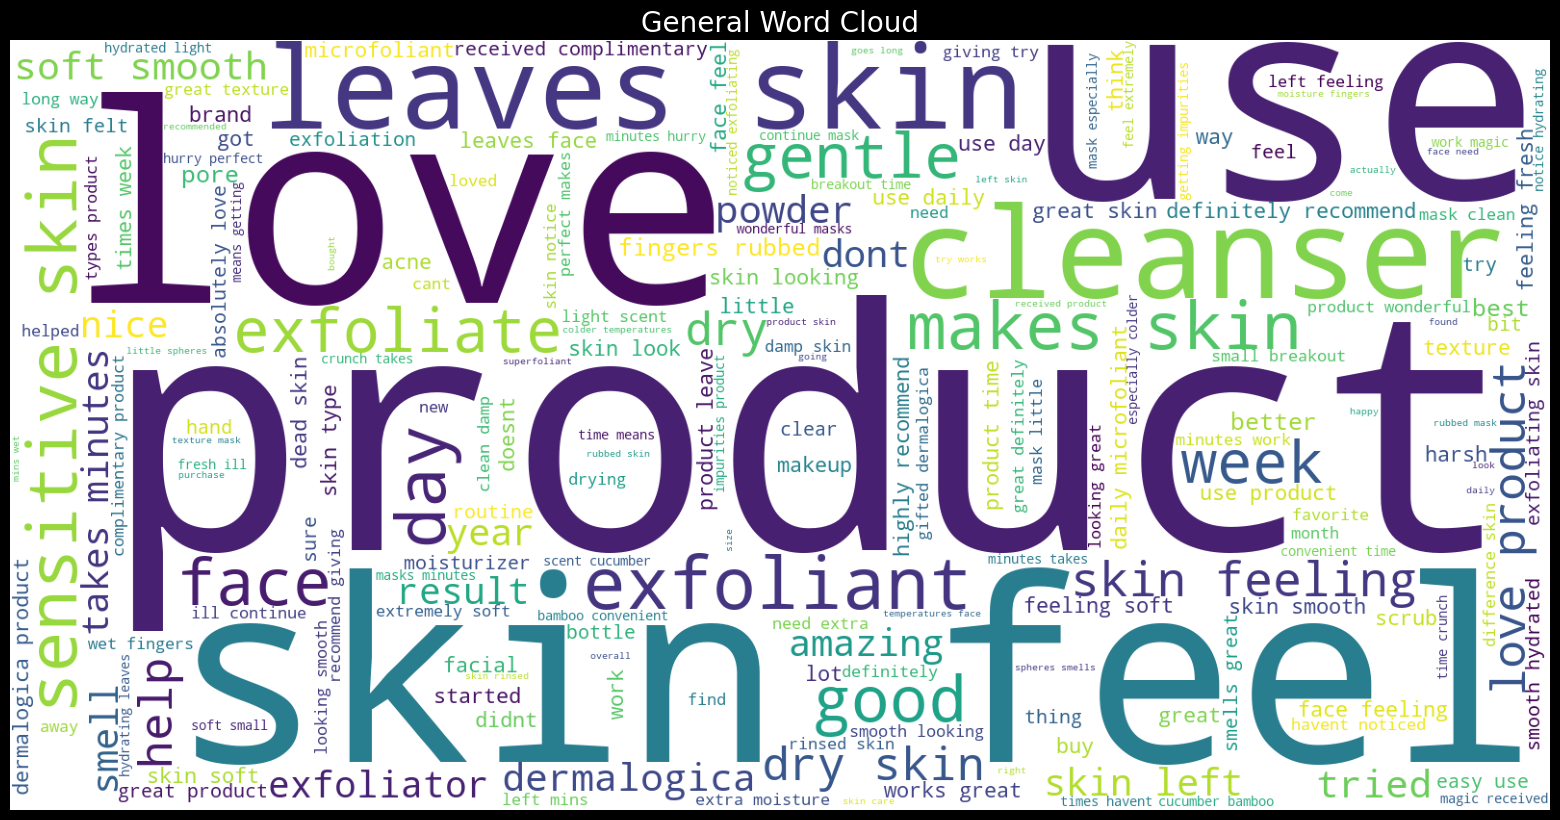

In [24]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10), facecolor='k')
wordcloud = WordCloud(background_color="white",
                      #max_font_size=40,
                      width=1600,
                      height=800,
                      random_state=42
                     ).generate(str(review_text))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('General Word Cloud',color='white', fontsize=20)
plt.show()

## What can the reviews tell us about the products?

The reviews generally point to the fact that the products are good and this is reflected in words like amazing, love,good, help being used frequently and hardly any negative words popping out.

## Do most buyers have common skincare issues? 

From the review, a good amount of reviews mention sensitive skin which points to the fact that many buyers may have that and dry skin which is a bit smaller.
Apart from that the reviews don't really indicate common skin problems
drilling further to specific products skin care issues like blemishes, blackheads, acne small breakouts start to show up.

i.e. Buyers with similar skincare issues usually go for similar products but buyers with mostly sensitive and  few with dry skin usually buy these products

## What issues did the products help solve or exacerbate?
The product helps to exfoliate and clean.

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

In [25]:
Thermafoliant=reviews[reviews['Product']=='Multi-Vitamin Thermafoliant']

Exfoliant=reviews[reviews['Product']=='Hydro Masque Exfoliant']

Superfoliant=reviews[reviews['Product']=='Daily Superfoliant']

Microfoliant=reviews[reviews['Product']=='Daily Microfoliant']

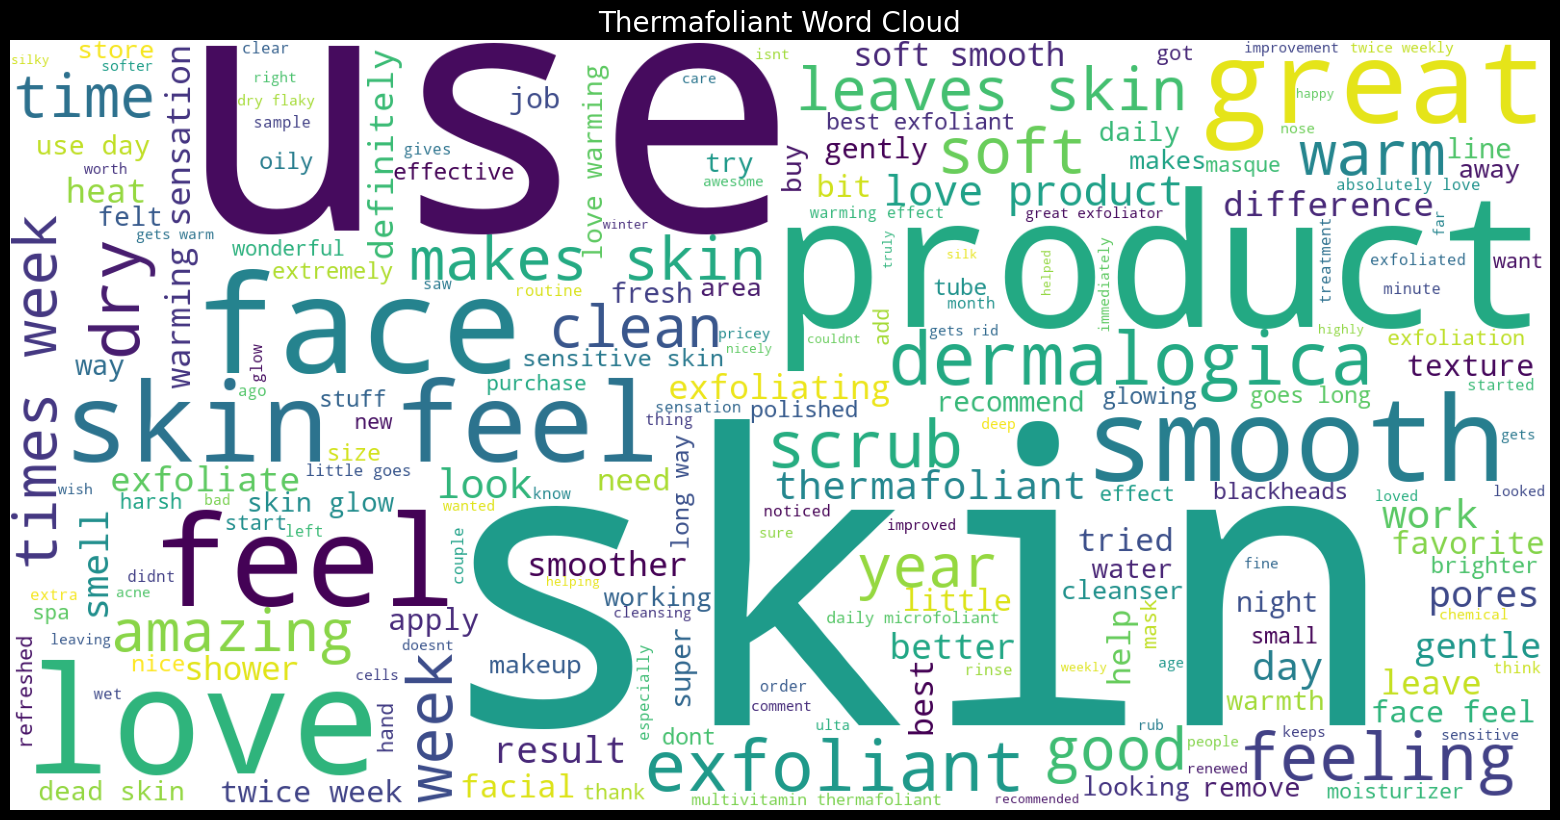

In [26]:
plt.figure(figsize=(20,10),facecolor='k')
wordcloud = WordCloud(background_color="white",
                      #max_font_size=40,
                      random_state=42,
                      width=1600,
                      height=800,
                         ).generate(str(Thermafoliant['Review_Text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Thermafoliant Word Cloud',color='white', fontsize=20)
plt.show()

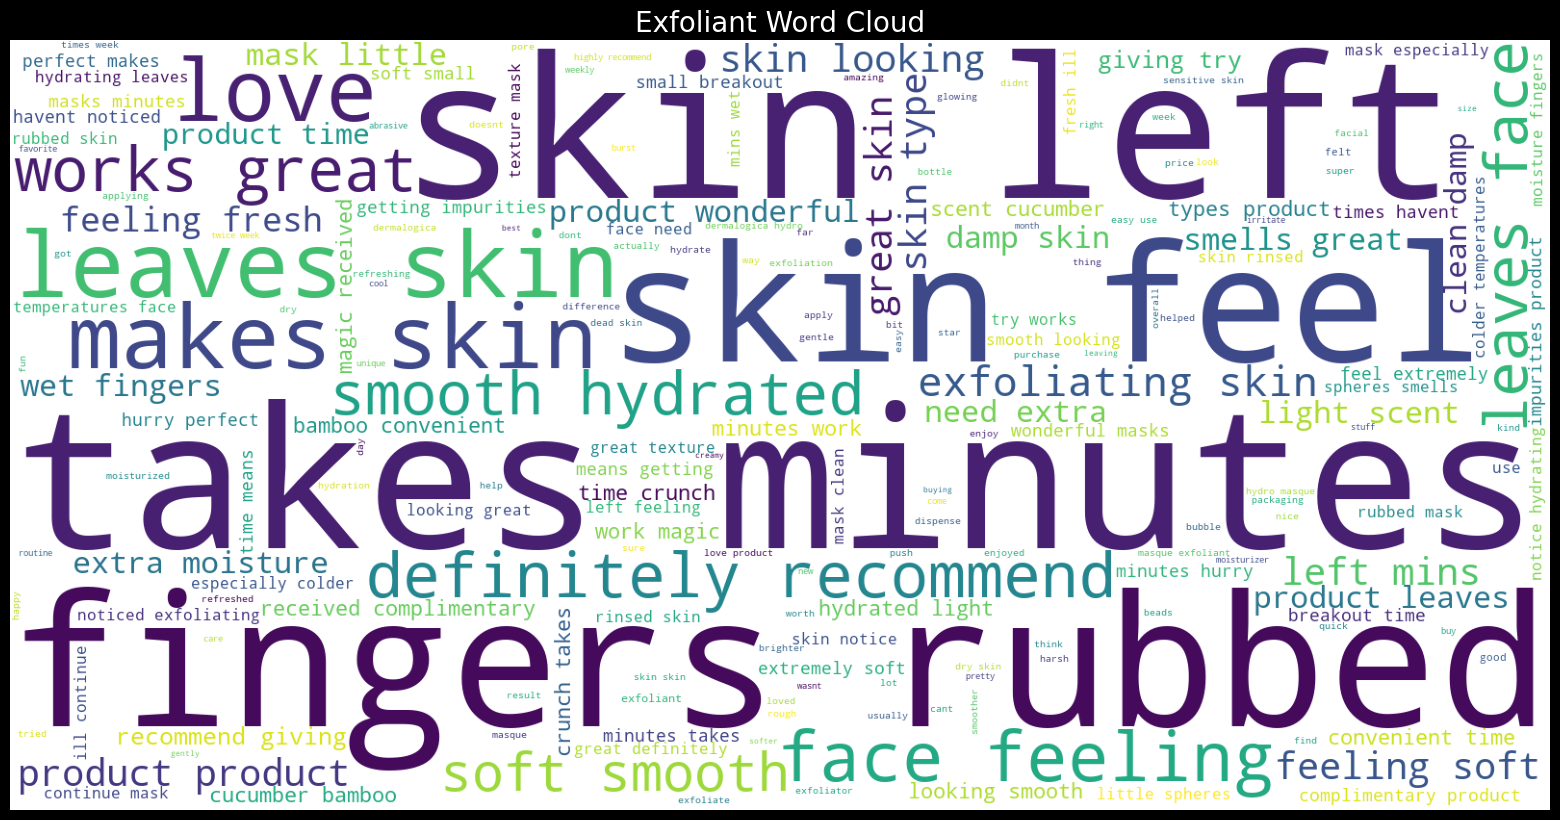

In [27]:
plt.figure(figsize=(20,10), facecolor='k')
wordcloud = WordCloud(background_color="white",
                      #max_font_size=40,
                      random_state=42,
                      width=1600,
                      height=800,
                     ).generate(str(Exfoliant['Review_Text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Exfoliant Word Cloud',color='white', fontsize=20)
plt.show()

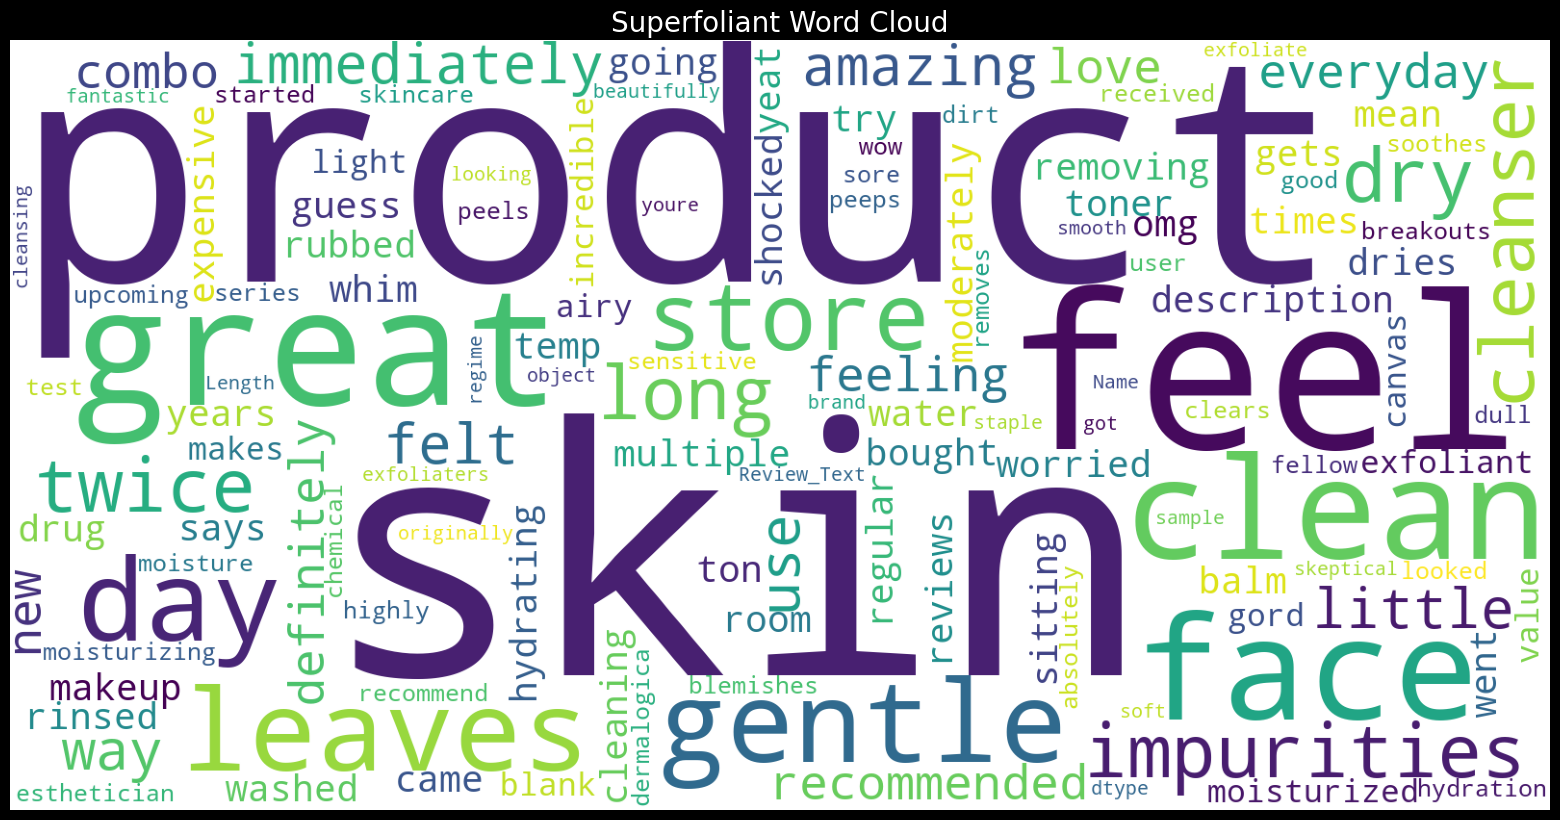

In [28]:
plt.figure(figsize=(20,10), facecolor='k')
wordcloud = WordCloud(background_color="white",
                      #max_font_size=40,
                      random_state=42,
                      width=1600,
                      height=800,
                     ).generate(str(Superfoliant['Review_Text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Superfoliant Word Cloud',color='white', fontsize=20)
plt.show()

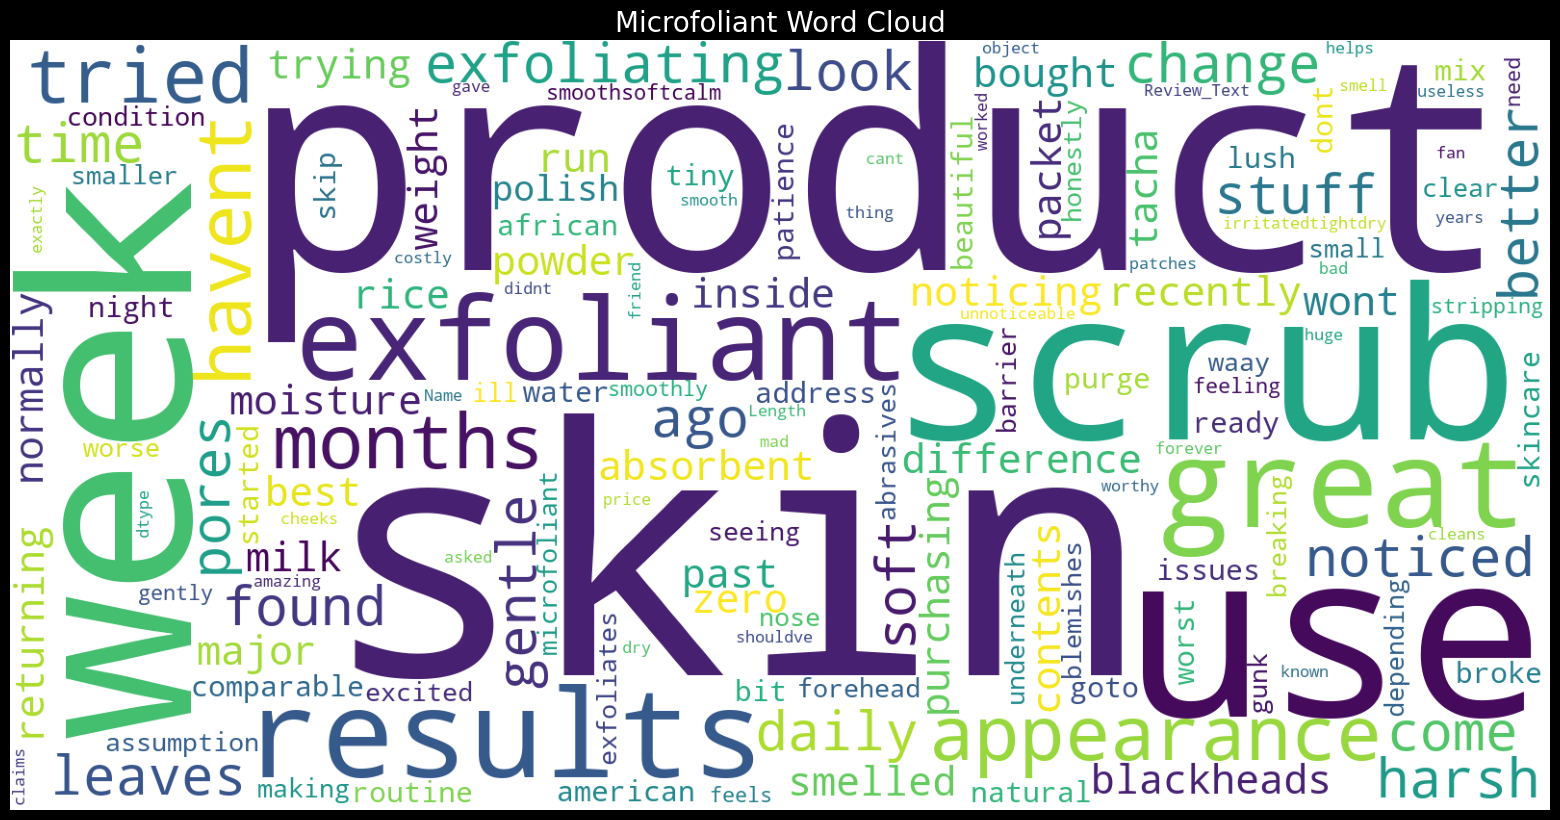

In [29]:
plt.figure(figsize=(20,10), facecolor='k')
wordcloud = WordCloud(background_color="white",
                      #max_font_size=40,
                      random_state=42,
                      width=1600,
                      height=800,
                     ).generate(str(Microfoliant['Review_Text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Microfoliant Word Cloud',color='white', fontsize=20)
plt.show()

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [30]:
reviews=reviews.drop('Brand', axis='columns')

In [31]:
from spacytextblob.spacytextblob import SpacyTextBlob

In [32]:
#adding spacytextblob to nlp pipeline
nlp.add_pipe('spacytextblob')

In [33]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x13d2d811b80>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x13d2d811340>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x13d2d6d5dd0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x13d2d823f80>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x13d2d9a1640>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x13d2da42120>),
 ('spacytextblob',
  <spacytextblob.spacytextblob.SpacyTextBlob at 0x13d31d1a520>)]

In [34]:
# using the extended Spacy pipeline to get the polaritty score for each review text
reviews['review_text_sentiment']=reviews['Review_Text'].apply(lambda x: nlp(x)._.polarity)

In [35]:
reviews.head(20)

Review_Title  \
0                        perfect   
1                          need    
2                     clean skin   
3                    love  stuff   
4            exfoliates  nicely    
5           seriously nice scrub   
6                absolutely love   
7       truly like  multivitamin   
8                       favorite   
9                       excelent   
10      love  product  exfoliate   
11       helped  dry winter face   
12  favorite dermalogica product   
13    great product  feel gently   
14                best exfoliant   
15      best thermafoliant scrub   
16                  recommendyes   
17    multivitamin thermafoliant   
18                 great product   
19            favorite exfoliant   

                                                                                                                                                                                                                                                                                                                            Review_Text  \
0                                                                                                                                                                                                                                                                             love     face    shower heats   gives  light scrub nicely   
1                                                                                                                                                                                                                                                                               better   daily microfoliant  obsessed  skin    smoother   
2                                                                                                                                                                                                                                                                                      enjoy  product     look forward      feels great   
3                                                                                                                                                                                                      tried  like     love    apply    face    little shot  warm  feels  good  scrub   gritty     effects  encountered   positive ones   
4                                                                                                                                                                                                                                 exfoliates  nicely  gives   smooth skin    irritation   reaction   skin   highly recommended    buy     
5                                                                                                                                                                                                                                                     love    use  wet  dry   control  abrasive   leaves  face soft  drenched  vitamins   
6                                                                                                                                                                                                                                                                                                                       absolutely love   
7                                                                                                                                                                                                            truly like  multivitamin thermafoliant product         7 years   happy  purchase directly    longer available   ulta store   
8                                                                                                                                                                                                                                                                                           

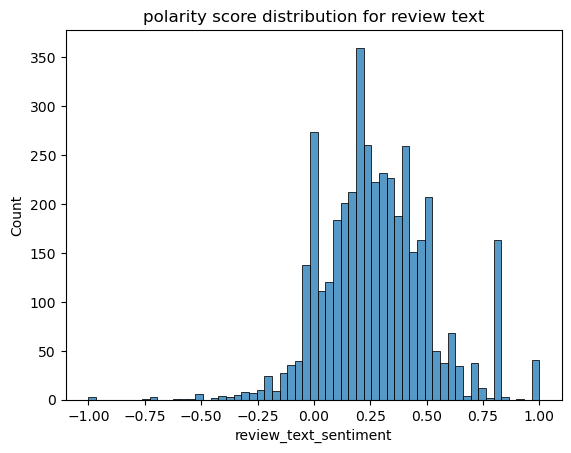

In [36]:
%matplotlib inline
sns.histplot(reviews['review_text_sentiment'])
plt.title('polarity score distribution for review text')
plt.show()

In [37]:
# worse reviews
reviews[reviews['review_text_sentiment']==-1]

Review_Title  \
1743   breathe   product   comes    bottle   
1929                                smell    
3467                          smell  awful   

                                                                                                                                                           Review_Text  \
1743     powder     mix   water    paste    apply   skin    shake     bottle  gets   air   breathe    coughed   minutes  getting     bottle   smells terrible    use     
1929                                                                                                                                   smells horrific wont repurchase   
3467                                                                                                                                    smells like  porta potty awful   

     Verified_Buyer Review_Date Review_Location  Review_Upvotes  \
1743             No           0         Wyoming               4   
1929             No        1095         Chicago               0   
3467             No        1095           Fargo               0   

      Review_Downvotes             Product Scrape_Date  review_text_sentiment  
1743                11  Daily Superfoliant  2023-03-27                   -1.0  
1929                 2  Daily Superfoliant  2023-03-27                   -1.0  
3467                 1  Daily Microfoliant  2023-03-27                   -1.0

In [38]:
# best reviews
reviews[reviews['review_text_sentiment']==1]

Review_Title  \
74                         best exfoliant   
112                    highly recommended   
132                                  best   
135                               awesome   
143                        product  like    
179                                  best   
186                                  love   
212                              hardcore   
262                       product    use    
400                     excellent product   
415                          dont think     
497                            amazingggg   
1165  creamy  hydrating best moisturizing   
1249                      awesome product   
1311                                 nice   
1358                                 best   
1452                   awesome +1 leaves    
1470                                 skin   
1479        dermatologist products   best   
1520                   perfect  traveling   
1547                         superfoliant   
1614                             awesome    
1630                                love    
1664                      best face wash    
1690                         superfoliant   
1792                    wonderful product   
1794                     awesome cleanser   
1805                      awesome product   
1900                                 sure   
1954                        buy  product    
2159                buy  product   againe   
2308                      buy  product      
2699                                love    
2747                     definitely buy     
3391                               loved    
3798                                love    
3849                              amazing   
3890                           absolutely   
3981                        love  product   
4016                    best facial scrub   

                                                                                                                                            Review_Text  \
74                                                                                                                                          best  found   
112                                                                                                                          dermalogicas best products   
132                                                                                                                          awesome product  recommend   
135                                                                                                                                             awesome   
143    product  like  microdermabrasion treatment  use    shower  scrub  neck  night serum works perfectly   scrub     drying   dont apply moisturizer    
179                                                                                                                               best exfoliate    use   
186                                                                                                                                    best exfoliation   
212                                                                   microexfoliant  20 yes   best    want  hardcore exfoliation  brightening      use   
262                                                                                                           use twice weekly   skin  magnificent glow   
400                                                                                                                                   excellent product   
415                                                                                                            dont think   masque best suited yo  skin   
497                                                                                                              best face mask        staple   routine   
1165                                                                                                creamy  hydrating best moisturizing cleanser  tried   
1249         

In [39]:
# neutral reviews
reviews[reviews['review_text_sentiment']==0]

Review_Title  \
1                                             need    
9                                          excelent   
18                                    great product   
21                                            love    
32                            noticeable difference   
38                                            like    
45                                      use   times   
52                             yes   like  product    
64                              great skin polisher   
69                                           treat    
79                         stop sending  promotions   
82                                 id like  cancel    
91               favourite product exfoliates like    
106                                        product    
107                                                   
141                                                   
146                                         amazing   
168                                         6 years   
174                                     yes   buy     
182                              didnt   difference   
188                                           love    
206                                         awesome   
213                      good   expensive  quantity   
217                                 best face scrub   
253                               skin care routine   
258                         love  soft  makes  skin   
267                              buy  product agaun   
270               definitely works better   generic   
275                                   great product   
291                                    worth  money   
316                                         liking    
318                                 awesome results   
326                                   great product   
327                              absolute favorite    
328                                   great product   
335            product feels likes   working   skin   
357                                   reduce price    
361                                            okay   
396                                          unique   
432                         hard time     beginning   
449                                    awesome mask   
452                                       best mask   
457                                                   
461                            second favorite mask   
468                                            okay   
480                                          use      
671                                 results   purge   
687                                      best mask    
1153                                          like    
1166                                product works     
1188                                dont feel  item   
1213                                          smell   
1214                                          love    
1218                                 help  moisture   
1226                                         loved    
1236                                    calms  skin   
1324                                   good product   
1334                                          great   
1381                                  greet product   
1411                                     beneficial   
1422                                           like   
1471                                      luxurious   
1485                          charcoalian face wash   
1498                                       perfecto   
1507                              horrible reaction   
1533                    havent noticed  difference    
1552                   deep cleansing  moisturizing   
1559                                         like     
1560                                         staple   
1585                                             20   
1607                                         like     
1620                               like  way  makes   
1647                    

#### from the histogram showing the sentiment score most review texts were slightly more positive and we had just a few negative reviews

## sentiment analysis on review title

the review titles are shorter and they may be a better indication of sentiments, so checking that out

In [40]:
# using the extended Spacy pipeline to get the polaritty score for each review title
reviews['review_title_sentiment']=reviews['Review_Title'].apply(lambda x: nlp(x)._.polarity)

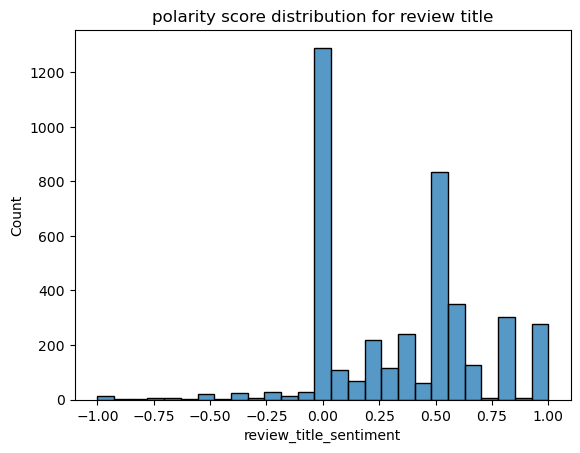

In [41]:
%matplotlib inline
sns.histplot(reviews['review_title_sentiment'])
plt.title('polarity score distribution for review title')
plt.show()

there titles are more neutral and more positive looking at the sentiment scores